# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 7</center>

# <center>Machine Learning Workflow</center>

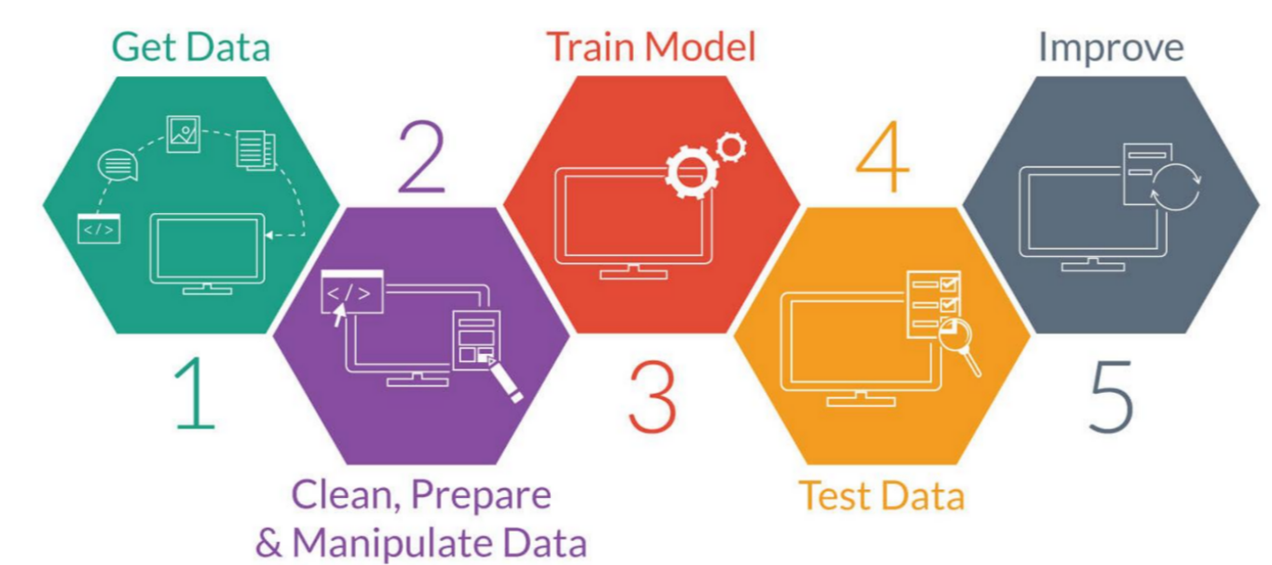

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Data Manipulation and Feature Engineering</li>
<li> Train Test Split</li>
<li> Train model </li>
<li> Test the Model</li>
<li> Make Predictions </li>
</ol>

## <font color = blue>0. Learning Objectives

Follow machine learning workflow to create machine learning model and evaluate the performance of the machine learning model.

By the end of the lab, you should be able to :
- Load dataset and perform necessary data engineering and feature engineering techniques on given dataset.


- Split given dataset into train and test set.


- Evaluate the model performance for both train and test dataset.




## <font color = blue>1. Loading Data

    - Load iris flower data from sklearn.datasets module. Create dataframe from the iris data.
    
    
### Different species of Iris Flower
!["Iris Species"](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

### Dataset and Iris Attributes

![](https://bishwamittra.github.io/images/imli/iris_dataset.png)

In [76]:
#Load your data here
#Load the iris datasets using sklearn : Note you can also d/l from UCI and read using pd.read_csv
from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()




dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
# Get the detail info on the dataset
# Such as: How are the data arranged, name of the column, units, missing values



In [3]:
#explore other keys in in the given data


In [77]:
#Usually I keep all the data in a Pandas dataframe.
#So we need to combine the features and targets(labels) into a single dataframe
import pandas as pd
idf = pd.DataFrame(iris.data,columns=iris.feature_names)
idf.head()
#Add the features


#Add the label (target)
idf['target'] = iris.target
idf.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [9]:
idf.shape

(150, 5)

In [6]:
#use pandas basic methods to get result




## <font color = blue>2. Data Manipulation and Feature Engineering


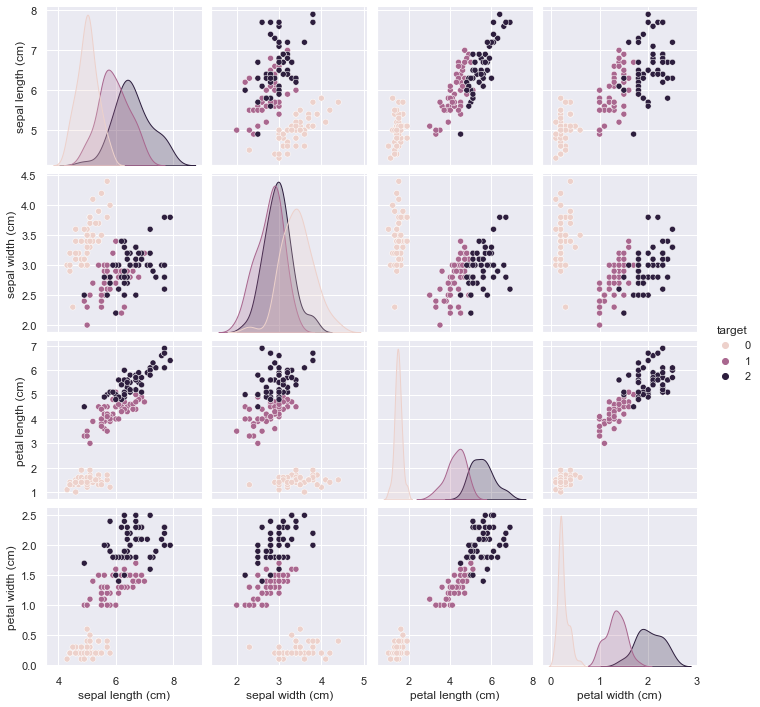

In [78]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
#Plot the distribution of each fetures of each class
sns.pairplot(idf, hue= "target")




<AxesSubplot:>

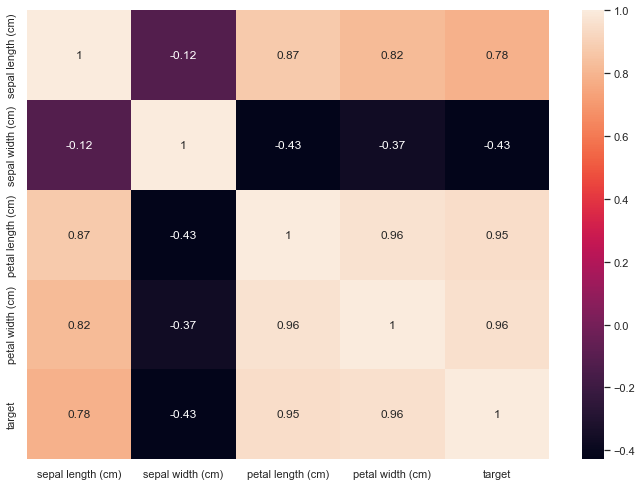

In [79]:
#use pair plot to check relation
data = idf.corr()
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.26)})
sns.heatmap(data,annot = True)



In [10]:
#Let's do correlation plot on the data to see how the each features are co-related

# A high correlation can help us use dimension reduction



## <font color = blue>3. Split data for train and test



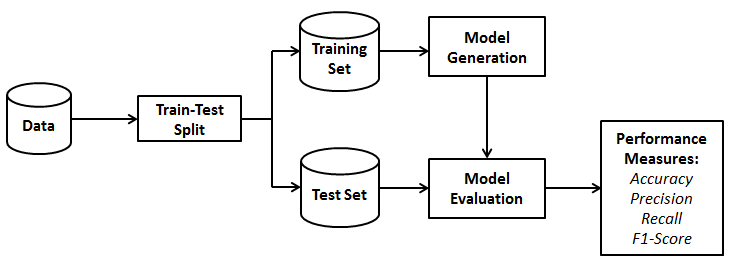

1.   Split the data to 80% training and 20% testing
2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`

In [80]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
X = idf.drop(['target'],axis=1)
y = idf.target

#Split the data into training and testing sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5,stratify=idf.target)



In [81]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## <font color = blue>4. Training Model


In [82]:
#Import the estimators from the sklearn libraries
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Train the model


#Start the training   
model.fit(X_train,y_train)

C:\Users\gcit2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## <font color = blue>5. Test Model


In [83]:
#Test out the model using some prediction
y_pred=model.predict(X_test)


In [26]:
y_test

36     0
27     0
38     0
105    2
93     1
141    2
9      0
16     0
80     1
94     1
8      0
39     0
86     1
118    2
53     1
124    2
111    2
129    2
47     0
61     1
35     0
92     1
127    2
133    2
57     1
14     0
148    2
122    2
51     1
95     1
Name: target, dtype: int32

## <font color = blue>6. Model Evaluation
    
- Model evaluation is the process of using different evaluation metrics to understand a machine learning model's performance, as well as its strengths and weaknesses
    
    

### <font color = "blue">6.1 Accuracy Score

Accuracy is one metric for evaluating classification models. Informally, accuracy is the fraction of predictions our model got right.
    
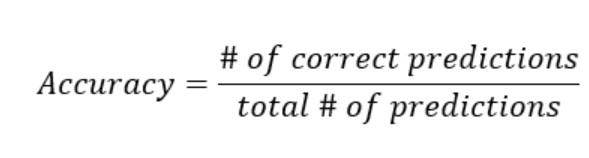

`sklearn.metrics.accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)`

In [84]:
# Find accuracy score for test data.
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)


0.9666666666666667

In [85]:
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

## <font color = blue>5. Make Predictions


In [86]:
#Use predict method to make prediction to unseen data

x_sample = [[6,3.9,2,0.9]]
value = model.predict(x_sample)[0]

iris.target_names[0]


C:\Users\gcit2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'setosa'

# TODO/ HOMEWORK


INSTRUCTIONS:

- Follow Machine learning Workflow and create model for boston housing dataset. 



- Compare train and test accuracy for the model.

In [87]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\gcit2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [88]:
import pandas as pd
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [89]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

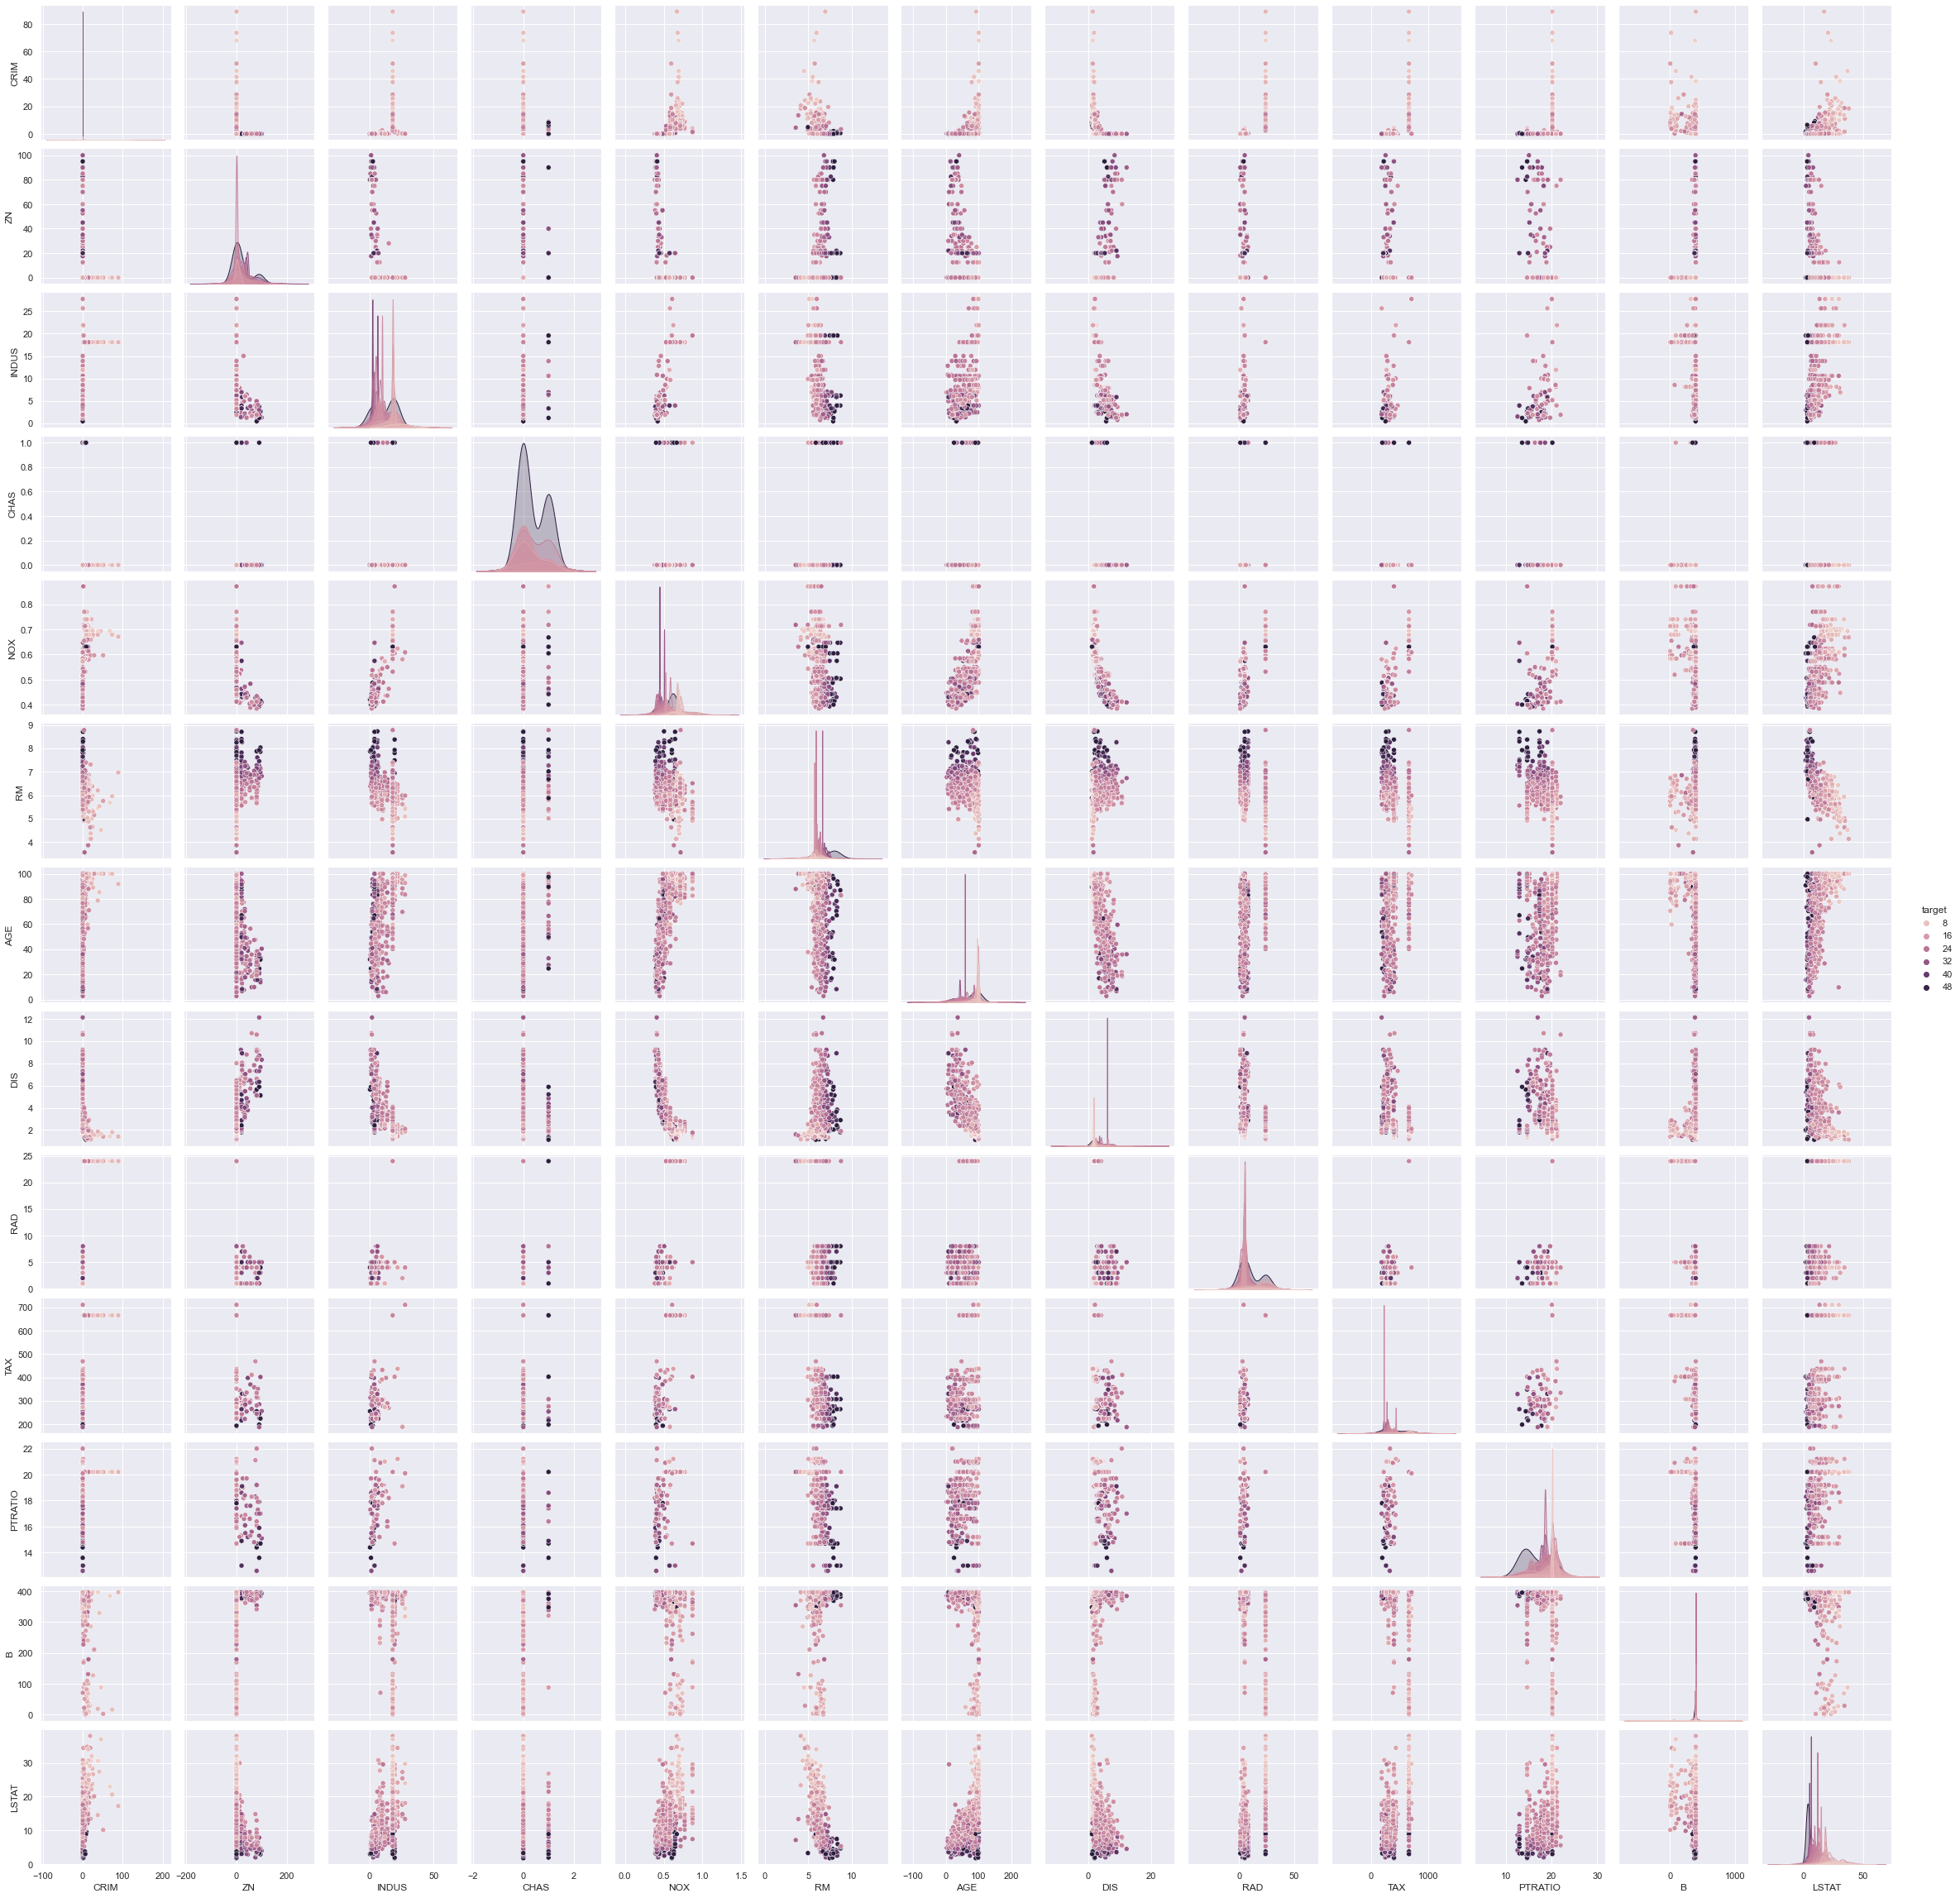

In [90]:
import matplotlib.pyplot as plt
#Let's do some visualisation
import seaborn as sns
#Plot the distribution of each fetures of each class
sns.pairplot(df, hue= "target")


<AxesSubplot:>

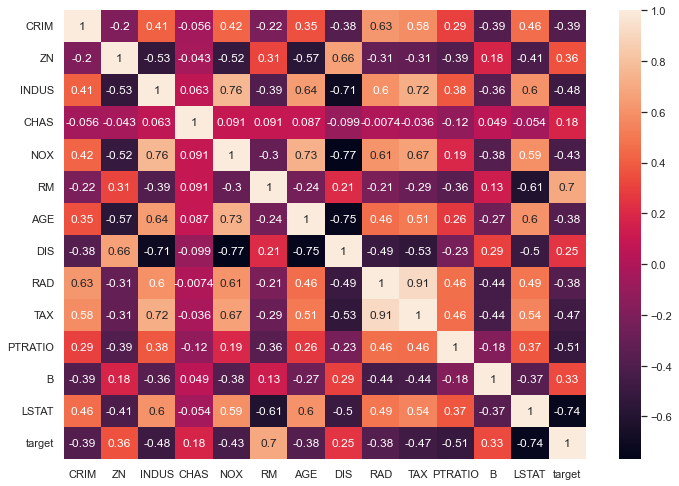

In [91]:
#use pair plot to check relation
data = df.corr()
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.26)})
sns.heatmap(data,annot = True)

In [92]:
from sklearn.model_selection import train_test_split
# X contains the features, y is the label
X1 = df.drop(['target','AGE','ZN','DIS'],axis=1)
y1 = df.target

#Split the data into training and testing sets

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=5)

In [93]:
X1_train

CRIM  INDUS  CHAS    NOX     RM   RAD    TAX  PTRATIO       B  LSTAT
33    1.15172   8.14   0.0  0.538  5.701   4.0  307.0     21.0  358.77  18.35
283   0.01501   1.21   1.0  0.401  7.923   1.0  198.0     13.6  395.52   3.16
418  73.53410  18.10   0.0  0.679  5.957  24.0  666.0     20.2   16.45  20.62
502   0.04527  11.93   0.0  0.573  6.120   1.0  273.0     21.0  396.90   9.08
402   9.59571  18.10   0.0  0.693  6.404  24.0  666.0     20.2  376.11  20.31
..        ...    ...   ...    ...    ...   ...    ...      ...     ...    ...
486   5.69175  18.10   0.0  0.583  6.114  24.0  666.0     20.2  392.68  14.98
189   0.08370   3.44   0.0  0.437  7.185   5.0  398.0     15.2  396.90   5.39
495   0.17899   9.69   0.0  0.585  5.670   6.0  391.0     19.2  393.29  17.60
206   0.22969  10.59   0.0  0.489  6.326   4.0  277.0     18.6  394.87  10.97
355   0.10659   1.91   0.0  0.413  5.936   4.0  334.0     22.0  376.04   5.57

[404 rows x 10 columns]

In [55]:
y1_test

226    37.6
292    27.9
90     22.6
373    13.8
273    35.2
       ... 
349    26.6
212    22.4
156    13.1
480    23.0
248    24.5
Name: target, Length: 102, dtype: float64

In [73]:
#create linear model
from sklearn.linear_model import LinearRegression

#create linear regression object/model

model1 =LinearRegression()

#Train the model/fit data to model
model1.fit(X1,y1)

LinearRegression()

In [94]:
model1.coef_

array([-0.07686794,  0.12870355,  2.90344326, -6.3976968 ,  4.46695931,
        0.30381217, -0.01284266, -1.01899535,  0.01021176, -0.4986312 ])

In [95]:
model1.intercept_

20.466630112516278

In [98]:
#creating y_pred
from sklearn.metrics import mean_squared_error
y_pred = model1.predict(X1)
y_pred

MSE = mean_squared_error(y_pred,y1)
MSE



24.569080071690156

In [104]:
#Use predict method to make prediction to unseen data
x_sample = [[6,8,9,3,2,3,3,3,3,3],[7,2,1,4,1,3,3,2,2,4]]
model1.predict(x_sample)

C:\Users\gcit2\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33.25753258, -1.17360642])

In [107]:
train=model1.predict(X_train)
train

C:\Users\gcit2\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- petal length (cm)
- petal width (cm)
- sepal length (cm)
- sepal width (cm)
Feature names seen at fit time, yet now missing:
- B
- CHAS
- CRIM
- INDUS
- LSTAT
- ...

  warnings.warn(message, FutureWarning)


ValueError: X has 4 features, but LinearRegression is expecting 10 features as input.

In [108]:
Train_MSE= mean_squared_error(train,y_train,y_train)
Train_MSE

NameError: name 'train' is not defined